In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [3]:
path = '/Users/malavica/Library/CloudStorage/OneDrive-Personal/Documents/careerfoundry/achviement 4/4'
df=pd.read_pickle(os.path.join(path, 'df_cleaned'))

In [4]:
df.dtypes

order_id                   object
user_id                    object
order_number                int64
orders_day_of_week          int64
order_hour_of_day           int64
days_since_prior_order    float64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
product_name               object
aisle_id                    int64
department_id               int64
prices                    float64
price_range_loc            object
busiest_day                object
busiest_days               object
busiest_period_of_day      object
max_order                   int64
loyalty_flag               object
mean_price                float64
spending_flag              object
median_days_spo           float64
regular_flag               object
gender                     object
state                      object
age                         int64
date_joined                object
number_of_dependents        int64
marital_status             object
income        

In [5]:
user_order = df[['user_id','product_id','reordered']]

In [6]:
user_order[user_order.duplicated(subset=['user_id','product_id'], keep='first')]

,user_id,product_id,reordered
1,1,196,1
2,1,196,1
3,1,196,1
4,1,196,1
5,1,196,1
...,...,...,...
32404853,106143,19675,1
32404854,106143,19675,1
32404856,66343,47210,1
32404857,66343,47210,1


In [7]:
user_order[user_order['user_id']==1].product_id.value_counts()

Series([], Name: count, dtype: int64)

In [8]:
user_order.head()

,user_id,product_id,reordered
0,1,196,0
1,1,196,1
2,1,196,1
3,1,196,1
4,1,196,1


In [9]:
reorder_counts = user_order[user_order['reordered'] == True].groupby(['user_id', 'product_id']).size().reset_index(name='reorder_count')


In [10]:
reorder_counts

,user_id,product_id,reorder_count
0,1,196,9
1,1,10258,8
2,1,12427,9
3,1,13032,2
4,1,13176,1
...,...,...,...
5320711,99999,46667,1
5320712,99999,46676,2
5320713,99999,47209,2
5320714,99999,47526,2


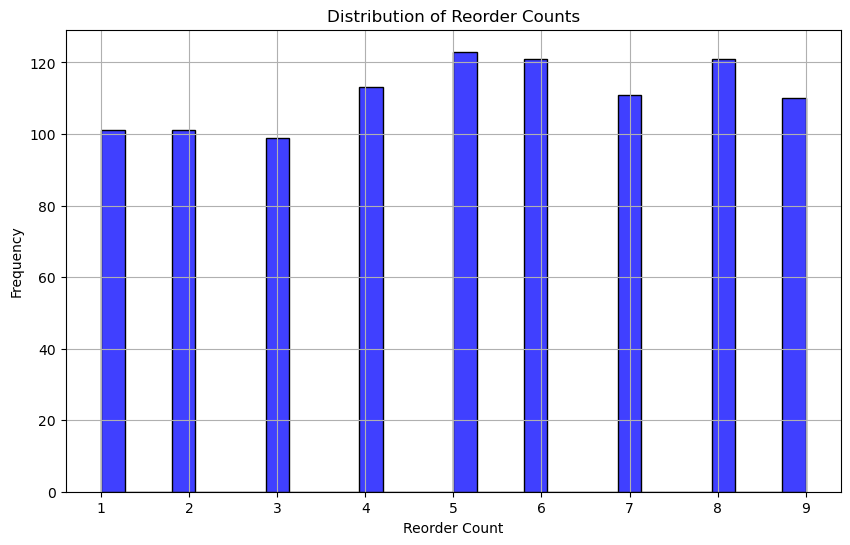

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data generation (let's assume a small sample due to the large size of your dataset)
n_samples = 1000
data = {
    'user_id': np.random.randint(1, 100000, n_samples),
    'product_id': np.random.randint(1000, 50000, n_samples),
    'reorder_count': np.random.randint(1, 10, n_samples)
}
df = pd.DataFrame(data)

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['reorder_count'], bins=30, kde=False, color='blue')
plt.title('Distribution of Reorder Counts')
plt.xlabel('Reorder Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [11]:


# Sample size
n_samples = 20

# Generate sample data
data = {
    'user_id': np.random.randint(1, 100000, n_samples),  # Random user IDs
    'product_id': np.random.randint(1000, 50000, n_samples),  # Random product IDs
    'reorder_count': np.random.randint(1, 10, n_samples)  # Random reorder counts
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


    user_id  product_id  reorder_count
0     14268       18529              1
1      5742       21431              4
2      6715        2461              8
3     38140       23739              7
4     63183       26416              4
5     17465       21348              3
6     48405       26791              2
7     40198        7983              3
8     69998       26173              2
9     26322       41154              6
10    26377        6203              1
11    80490       39630              1
12    48314        3577              7
13    60062        2265              7
14    98685       32840              7
15    82565       20505              2
16    55783       13880              7
17    63478       13980              9
18    62068       38012              9
19    47601       35134              3


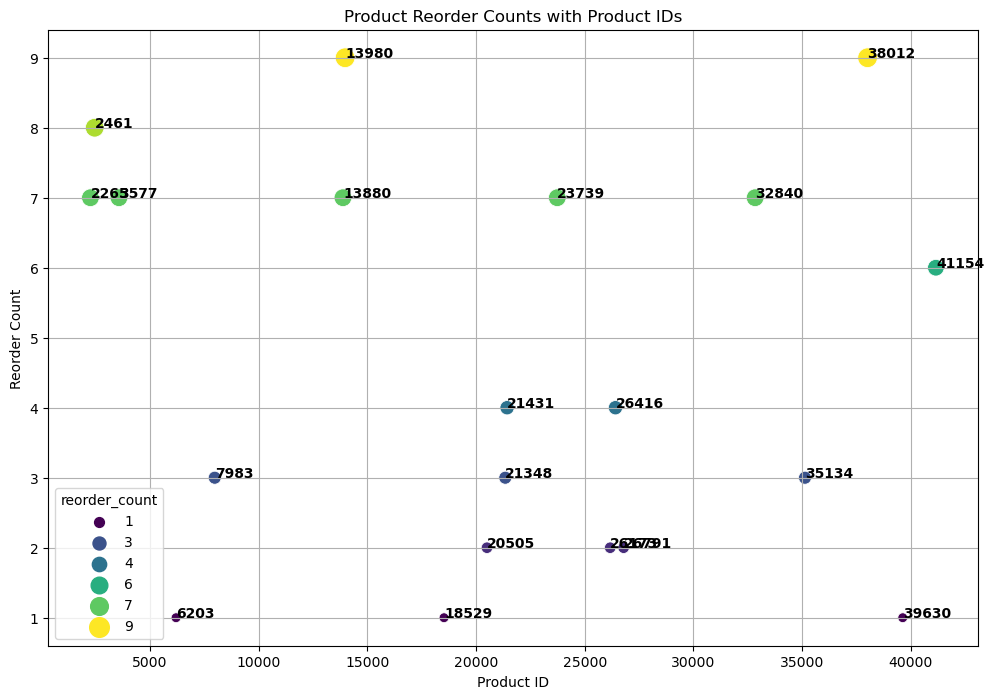

In [13]:


# Provided data
data = {
    'user_id': [14268, 5742, 6715, 38140, 63183, 17465, 48405, 40198, 69998, 26322, 26377, 80490, 48314, 60062, 98685, 82565, 55783, 63478, 62068, 47601],
    'product_id': [18529, 21431, 2461, 23739, 26416, 21348, 26791, 7983, 26173, 41154, 6203, 39630, 3577, 2265, 32840, 20505, 13880, 13980, 38012, 35134],
    'reorder_count': [1, 4, 8, 7, 4, 3, 2, 3, 2, 6, 1, 1, 7, 7, 7, 2, 7, 9, 9, 3]
}
df = pd.DataFrame(data)

# Visualization
plt.figure(figsize=(12, 8))
plot = sns.scatterplot(data=df, x='product_id', y='reorder_count', hue='reorder_count', palette='viridis', size='reorder_count', sizes=(50, 200))

# Annotating each point with its product_id
for line in range(0,df.shape[0]):
     plot.text(df.product_id[line]+0.2, df.reorder_count[line], df.product_id[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('Product Reorder Counts with Product IDs')
plt.xlabel('Product ID')
plt.ylabel('Reorder Count')
plt.grid(True)
plt.show()
